In [4]:
import scipy.stats as sp
import numpy as np
from statsmodels import distributions
import matplotlib.pyplot as plt

In [5]:
number_of_trials = 10000


# Law of Large Numbers

In [95]:
rv = sp.beta(5,5)


In [96]:
rv.ppf([.25,.5,.75])

array([0.39196384, 0.5       , 0.60803616])

In [97]:
r = np.sort(np.round(rv.rvs(size=number_of_trials),2))
#print(r)
print(r[int(np.ceil((number_of_trials/(1/.25))))])
print(r[int(np.ceil((number_of_trials/(1/.5))))])
print(r[int(np.ceil((number_of_trials/(1/.75))))])


0.38
0.49
0.6


# Hypogeometric

This is sample W/O replacement; standard notation is [K = amount of ouctomes we want in population, N = Amount of Others in population, n = samples takne]

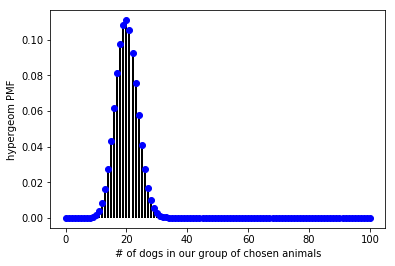

36
8


array([ -1.,  18.,  20.,  22., 100.])

In [20]:
[M, n, N] = [500, 100, 100] #First is the Number of Total Balls in Population, Second is the Number of Successes, Third is the number of draws
rv = sp.hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_dogs = rv.pmf(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_dogs, 'bo')
ax.vlines(x, 0, pmf_dogs, lw=2)
ax.set_xlabel('# of dogs in our group of chosen animals')
ax.set_ylabel('hypergeom PMF')
plt.show()
sample = np.sort(np.round(rv.rvs(size=number_of_trials),2))
print(np.max(sample))
print(np.min(sample))
rv.ppf([0.0,.25,.5,.75,1])


# Geometric 

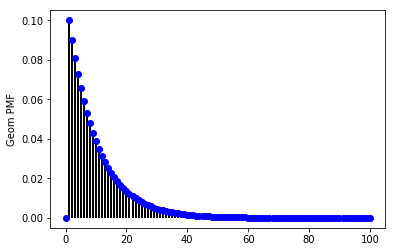

42
1


array([  1.,   3.,   7.,  14., 285.])

In [99]:
rv = sp.geom(.1)
x = np.arange(0, n+1)
pmf_dogs = rv.pmf(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_dogs, 'bo')
ax.vlines(x, 0, pmf_dogs, lw=2)
ax.set_ylabel('Geom PMF')
plt.show()
sample = np.sort(np.round(rv.rvs(size=number_of_trials),2))
print(np.max(sample))
print(np.min(sample))
rv.ppf([0.0000000000001,.25,.5,.75,.9999999999999])

# Negative binomial distribution

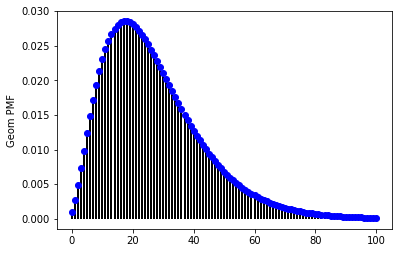

76
1
21.5


array([  0.,  15.,  24.,  36., 345.])

In [100]:
rv = sp.nbinom(3,.1)
x = np.arange(0, n+1)
pmf_dogs = rv.pmf(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_dogs, 'bo')
ax.vlines(x, 0, pmf_dogs, lw=2)
ax.set_ylabel('Geom PMF')
plt.show()
sample = rv.rvs(size=number_of_trials)
print(np.max(sample))
print(np.min(sample))
print(np.median(sample))
rv.ppf([0.0000000000001,.25,.5,.75,.9999999999999])

# Exponential and Poisson

In [101]:
lambda_ = 5

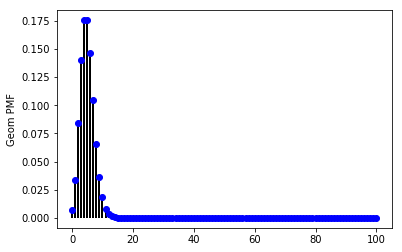

15
0
5.0


array([ 0.,  3.,  5.,  6., 29.])

In [117]:
rv = sp.poisson(lambda_)
x = np.arange(0, n+1)
pmf_dogs = rv.pmf(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_dogs, 'bo')
ax.vlines(x, 0, pmf_dogs, lw=2)
ax.set_ylabel('Geom PMF')
plt.show()
sample = rv.rvs(size=number_of_trials)
print(np.max(sample))
print(np.min(sample))
print(np.median(sample))
rv.ppf([0.0000000000001,.25,.5,.75,.9999999999999])

https://stats.stackexchange.com/questions/2092/relationship-between-poisson-and-exponential-distribution
The other answers do a good job of explaining the math. I think it helps to consider a physical example. When I think about a Poisson process, I always come back to the idea of cars passing on a road. Lambda is the average number of cars that pass per unit of time, let's say 60/hour (lambda = 60). We know, however, that the actual number will vary - some days more, some days less. The Poisson Distribution allows us to model this variability.

Now, an average of 60 cars per hour equates to an average of 1 car passing by each minute. Again though, we know there's going to be variability in the amount of time between arrivals: Sometimes more than 1 minute; other times less. The Exponential Distribution allows us to model this variability.

All that being said, cars passing by on a road won't always follow a Poisson Process. If there's a traffic signal just around the corner, for example, arrivals are going to be bunched up instead of steady. On an open highway, a slow tractor-trailer may hold up a long line of cars, again causing bunching. In these cases, the Poisson Distribution may still work okay for longer time periods, but the exponential will fail badly in modeling arrival times.

Note also that there is huge variability based on time of day: busier during commuting times; much slower at 3am. Make sure that your lambda is reflective of the specific time period you are considering.

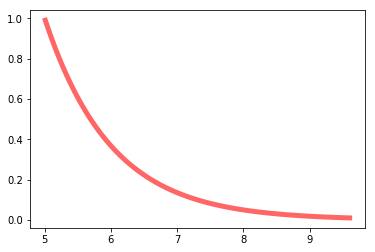

[5.         5.28768207 5.69314718 6.38629436        inf]


In [119]:
rv = sp.expon(5)
x = np.arange(0, n+1)
pdf_dogs = rv.pdf(x)

fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(rv.ppf(0.01),rv.ppf(0.99), 100)
ax.plot(x, rv.pdf(x),'r-', lw=5, alpha=0.6, label='expon pdf')
plt.show()
print(rv.ppf([0.000000001,.25,.5,.75,1]))
#sample = rv.rvs(10000)
#np.min(sample)

# Gamma

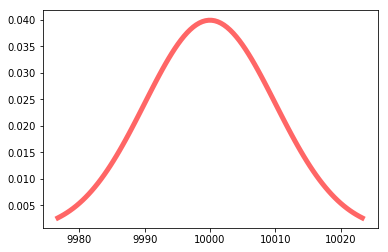

10000.0
100.0
[ 9940.1384615   9993.25328685  9999.99666667 10006.7430794
 10082.31682068]


In [18]:
a, b = 1000000, 100
rv = sp.gamma(a,scale = 1/b)
x = np.arange(0, 100+1)
pdf_dogs = rv.pdf(x)
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(rv.ppf(0.01),rv.ppf(0.99), 100)
ax.plot(x, rv.pdf(x),'r-', lw=5, alpha=0.6, label='expon pdf')
plt.show()
sample = rv.rvs(number_of_trials)
print(rv.mean())
print(rv.var())
print(rv.ppf([0.000000001,.25,.5,.75,.9999999999999999]))